<a href="https://colab.research.google.com/github/pranaviparuchuri/Authentication-Prediction/blob/main/Sad_Happy_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
img = image.load_img(r'/content/drive/MyDrive/Sad_Happy/train/happy/h9.jpg')

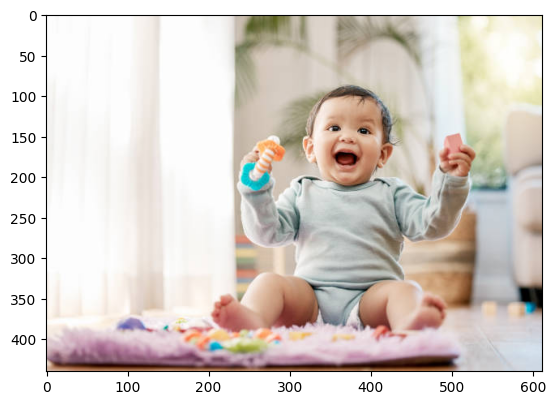

In [ ]:
plt.imshow(img)

In [ ]:
h = cv2.imread(r'/content/drive/MyDrive/Sad_Happy/train/happy/h9.jpg')

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [200, 237, 241],
        [200, 237, 241],
        [200, 237, 241]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [199, 236, 240],
        [199, 236, 240],
        [199, 236, 240]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [197, 234, 238],
        [197, 234, 238],
        [197, 234, 238]],

       ...,

       [[170, 188, 217],
        [165, 183, 214],
        [157, 177, 208],
        ...,
        [228, 216, 206],
        [228, 216, 206],
        [228, 216, 206]],

       [[173, 190, 217],
        [170, 186, 215],
        [166, 182, 211],
        ...,
        [228, 216, 206],
        [228, 216, 206],
        [228, 216, 206]],

       [[178, 192, 220],
        [177, 191, 219],
        [174, 188, 216],
        ...,
        [228, 216, 206],
        [228, 216, 206],
        [228, 216, 206]]], dtype=uint8)
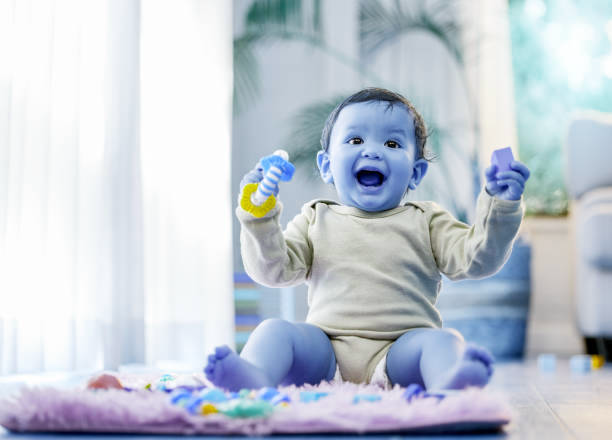

In [ ]:
h

In [ ]:
h.shape

(440, 612, 3)

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_data = train.flow_from_directory(r'/content/drive/MyDrive/Sad_Happy/train',
                                       target_size = (200, 200),
                                       batch_size = 3,
                                       class_mode = 'binary')
validation_data = validation.flow_from_directory(r'/content/drive/MyDrive/Sad_Happy/validation',
                                                 target_size = (200, 200),
                                                 batch_size = 3,
                                                 class_mode = 'binary')

Found 48 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'happy': 0, 'sad': 1}

In [ ]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear

                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['accuracy']
              )

In [ ]:
model_fit = model.fit(train_data,
                     steps_per_epoch = 3,
                     epochs = 35,
                     validation_data = validation_data)

Epoch 1/35
3/3 [==============================] - 1s 134ms/step - loss: 5.6911 - accuracy: 0.4444 - val_loss: 1.9391 - val_accuracy: 0.5000
Epoch 2/35
3/3 [==============================] - 0s 73ms/step - loss: 1.1657 - accuracy: 0.5556 - val_loss: 0.7747 - val_accuracy: 0.5000
Epoch 3/35
3/3 [==============================] - 0s 76ms/step - loss: 0.7378 - accuracy: 0.5556 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 4/35
3/3 [==============================] - 0s 72ms/step - loss: 0.7464 - accuracy: 0.2222 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 5/35
3/3 [==============================] - 0s 70ms/step - loss: 0.6951 - accuracy: 0.4444 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 6/35
3/3 [==============================] - 0s 62ms/step - loss: 0.6251 - accuracy: 0.7778 - val_loss: 0.7498 - val_accuracy: 0.5000
Epoch 7/35
3/3 [==============================] - 0s 71ms/step - loss: 0.7906 - accuracy: 0.4444 - val_loss: 0.7561 - val_accuracy: 0.5000
Epoch 8/35
3/3 [==========

In [ ]:
dir_path = r'/content/drive/MyDrive/Sad_Happy/test'

In [ ]:
for i in os.listdir(dir_path):
  print(i)

h10.jpg
h11.jpg
h12.jpg
h13.jpg
h14.jpg
h15.jpg
h16.jpg
h17.jpg
h18.jpg
h19.jpg
h20.jpg
h21.jpg
h22.jpg
h23.jpg
h24.jpg
s13.jpg
s14.jpg
s15.jpg
s16.jpg
s17.jpg
s18.jpg
s19.jpg
s20.jpg
s21.jpg
s22.jpg
s23.jpg
s24.jpg


1/1 [==============================] - 0s 31ms/step


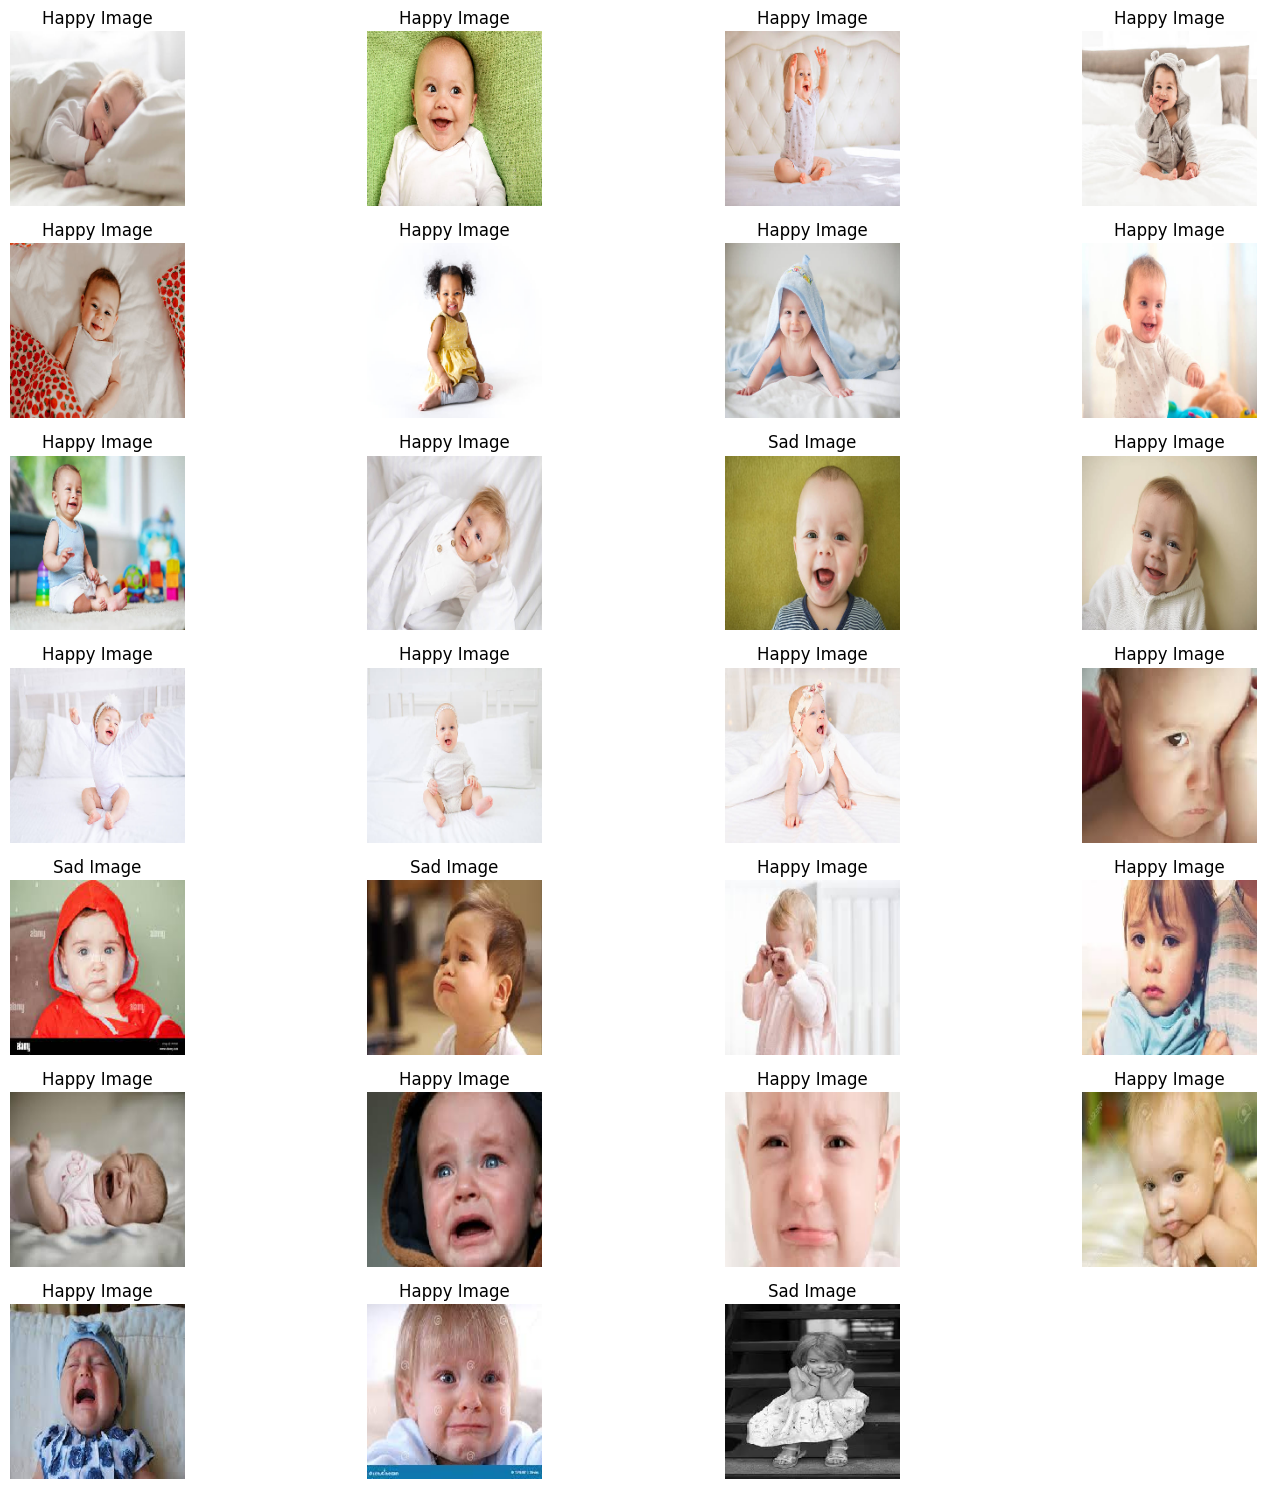

In [ ]:
dir_path = r'/content/drive/MyDrive/Sad_Happy/test'

plt.figure(figsize = (15,15))
columns = 4
rows = len(os.listdir(dir_path)) // columns + 1

for i, filename in enumerate(os.listdir(dir_path)):
    img_path = os.path.join(dir_path, filename)
    img = image.load_img(img_path, target_size = (200,200))
    plt.subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.axis('off')

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])

    val = model.predict(images)
    if val == 0:
        prediction = 'Happy Image'

    else:
        prediction = 'Sad Image'

    plt.title(prediction)

plt.tight_layout()
plt.show()
